<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Graded_Assignment_1/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Classifier

#Importing all the required libraries

In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


#Downloading the dataset

In [0]:
Digit_recognizer_mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = Digit_recognizer_mnist.load_data()


#Exploring the data

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

#Visualization

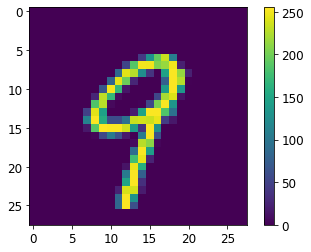

In [8]:
plt.figure()
plt.imshow(x_train[6779])
plt.colorbar()
plt.grid(False)
plt.show()

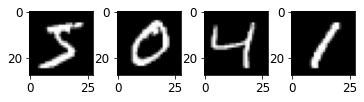

In [9]:
plt.subplot(341)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(342)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(343)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(344)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

#Data augmentation

In [10]:
datagen = ImageDataGenerator( 
        rotation_range = 40, 
        shear_range = 0.2, 
        zoom_range = 0.2, 
        horizontal_flip = True, 
        brightness_range = (0.5, 1.5))
datagen.fit(x_train[None])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1, 60000, 28, 28) (28 channels).
  ' channels).')


###To apply simple neural network using multi layer perceptron, we need to reduce the images from 3-D to vector of pixels using the reshape() function...

###Converting 28 * 28 pixel image to 784 vectors for each image

In [0]:
pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0],-1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0],-1)).astype("float32")


##Normalizing the input values

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
x_test.shape

(10000, 784)

In [14]:
x_train.shape

(60000, 784)

In [0]:
# one hot encode outputs
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes = y_test.shape[1]

In [16]:
y_train.shape

(60000,)

In [17]:
y_test.shape

(10000,)

##FeedForward Neural Network

###Activation Functions

In [0]:
# def sigmoid(x):
#   s = 1/(1+np.exp(-x))
#   return s

# def relu(x):
#   r =  np.maximum(0, x)
#   return r

# def relu_derivative(x):
#   return x>=0

# def softmax(x):
#   exps = np.exp(x - np.max(x))
#   return exps / exps.sum(axis=1)

###Defining a simple neural network model

In [0]:
class NN:
  def __init__(self, numof_input_nodes, numof_output_nodes):
    self.numof_input_nodes = numof_input_nodes
    self.numof_output_nodes = numof_output_nodes
    self.learn_rate = 1
    self.dropout = 0.1
    self.hidden_node_1 = 1000 #Hidden layer one
    self.hidden_node_2 = 500 #Hidden layer two
    self.input_neuron = 784 #Total number of input neurons
    self.output_neuron = 10 #Total number of output neurons
    self.create_wt_matrices()

  
  def relu(self, x): #Relu activation function
    r =  np.maximum(0, x)
    return r
  
  def sigmoid(self, x): #Sigmoid activation function
    s = 1/(1+np.exp(-x))
    return s
  
  def softmax(self, x): #Softmax activation function 
    e = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e/np.sum(e, axis=1, keepdims=True)

  def lr():
    self.learn_rate *= 0.1 #Learning rate

  #Creating weight and bias matrices
  def create_wt_matrices(self):
    self.w1 = 0.2 * np.random.randn(self.input_neuron, self.hidden_node_1) - 0.1
    self.bias1 = np.zeros((1, self.hidden_node_1))
    self.w2 = 0.2 * np.random.randn(self.hidden_node_1, self.hidden_node_2) - 0.1
    self.bias2 = np.zeros((1, self.hidden_node_2))
    self.w3 = 0.2 * np.random.randn(self.hidden_node_2, self.output_neuron) - 0.1
    self.bias3 = np.zeros((1, self.output_neuron))
 
  #Training our model
  def train(self):
    z1 = np.dot(self.numof_input_nodes, self.w1) + self.bias1
    self.A1 = self.sigmoid(z1)
    z2 = np.dot(self.A1, self.w2) + self.bias2
    self.A2 = self.relu(z2)
    z3 = np.dot(self.A2, self.w3) + self.bias3
    self.A3 = self.softmax(z3)
    
  #Predicting our model
  def predict(self, x):
    self.input = x
    self.train()
    return self.A3.argmax()

  #Dropout rates
# def dropout(self):
#   K = 1 - self.dropout
#   s1 = np.random.rand(self.A1.shape[0], self.A1.shape[1])
#   #print(D1)
#   s1 = s1 < K
#   self.A1 = np.multiply(self.A1, s1) 
#   self.A1 = self.A1/K

 

###Applying Mini-batch gradient descent

In [0]:
def mini_batch(inp, out, batch_size, shuffle=False):
  assert len(inp) == len(out)
  if shuffle:
    idx = np.random.permutation(len(inp))
  for first_idx in range(0, len(inp) - batch_size + 1, batch_size):
    if shuffle:
      e = idx[first_idx:first_idx + batch_size]
    else:
      e = slice(first_idx, first_idx + batch_size)
    yield inp[e], out[e]

###Getting the accuracy of the model

In [0]:
def get_accuracy_value(x, y):
  model = NN(x, y)
  accuracy = 0
  for a,b in zip(x, y):
    pred = model.predict(a)
    if pred == np.argmax(b):
      accuracy += 1
  return accuracy/len(x)*100

###Epochs, training and test accuracy of the model

In [0]:

epochs = 4
train = []
test = []
for epoch in range(1, epochs):
  for x_b, y_b in mini_batch(x_train, y_train, batch_size=64, shuffle=True):
    model = NN(x_b, y_b)
    model.train()
  # print("Epochs: ", epoch)
  # print(accuracy_score(y_test, model.predict(X_test))
  train_accuracy = get_accuracy_value(x_train, y_train)
  test_accuracy = get_accuracy_value(x_test, y_test)
  print("Epochs: ", epoch)
  print("Training_Accuracy:",train_accuracy)
  print("Test_Accuracy:",test_accuracy)
  train.append(np.mean(train_accuracy/100))
  test.append(np.mean(test_accuracy/100))

when I try to run the code either it keeps on running for a while or gets disconnected. I have tried several times and still not able to get output, I am not sure about what went wrong here..